# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly
%pip install mplcursors

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [ ]:
print(f'{df_hh_income.columns}\n')
print(f'{df_pct_poverty.columns}\n')
print(f'{df_pct_completed_hs.columns}\n')
print(f'{df_share_race_city.columns}\n')
print(f'{df_fatalities.columns}\n')

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')



In [ ]:
df_hh_income['Median Income'].fillna(0, inplace=True)
df_hh_income.isna().sum()

# checking for Nan value
df_pct_poverty.isna().sum()

df_pct_completed_hs.isna().sum()

df_share_race_city.isna().sum()

df_fatalities.isna().sum()


<ipython-input-5-d33f137bfe93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hh_income['Median Income'].fillna(0, inplace=True)


,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,77
gender,0
race,195
city,0
state,0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_fatalities[df_fatalities.age.isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.tail()

# # converting the poverty_rate to float data type
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')


# # grouping by  US_state
us_state_poverty = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate': 'mean'}).reset_index()

us_state_poverty.sort_values(by='poverty_rate', ascending=False).reset_index(drop=True)

,Geographic Area,poverty_rate
0,MS,26.88
1,AZ,25.67
2,GA,23.78
3,NM,23.08
4,AR,22.96
5,LA,22.34
6,SC,22.16
7,WV,21.13
8,OK,20.66
9,AL,20.65


In [ ]:
# creating the bar chart
fig = px.bar(us_state_poverty,
             x='Geographic Area',
             y='poverty_rate',
             color = 'poverty_rate',
             title='Poverty Rate by US State',
             hover_name='Geographic Area',
             hover_data={'poverty_rate': True},
             color_continuous_scale='Viridis',
             )

fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    xaxis_title='US State',
    yaxis_title='Poverty Rate',
    coloraxis_showscale=False
    )
fig.show()



# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.tail()
# converting the percent_completed_hs as float
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

hs_grad_rate = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': 'mean'}).reset_index() # grouping the data
hs_grad_rate.sort_values(by='percent_completed_hs', ascending=True).reset_index(drop=True) # sorting in descending order

# creating a px.bar chart
fig = px.bar(hs_grad_rate,
             x='Geographic Area',
             y='percent_completed_hs',
             color = 'percent_completed_hs',

             title='High School Graduation Rate by US State',
             hover_name='Geographic Area',
             hover_data={'percent_completed_hs': True},
             color_continuous_scale='Viridis',
             )

fig.update_layout(
    xaxis={'categoryorder':'total ascending'},
    xaxis_title='US State',
    yaxis_title='High School Graduation Rate',
    coloraxis_showscale=False
    )
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

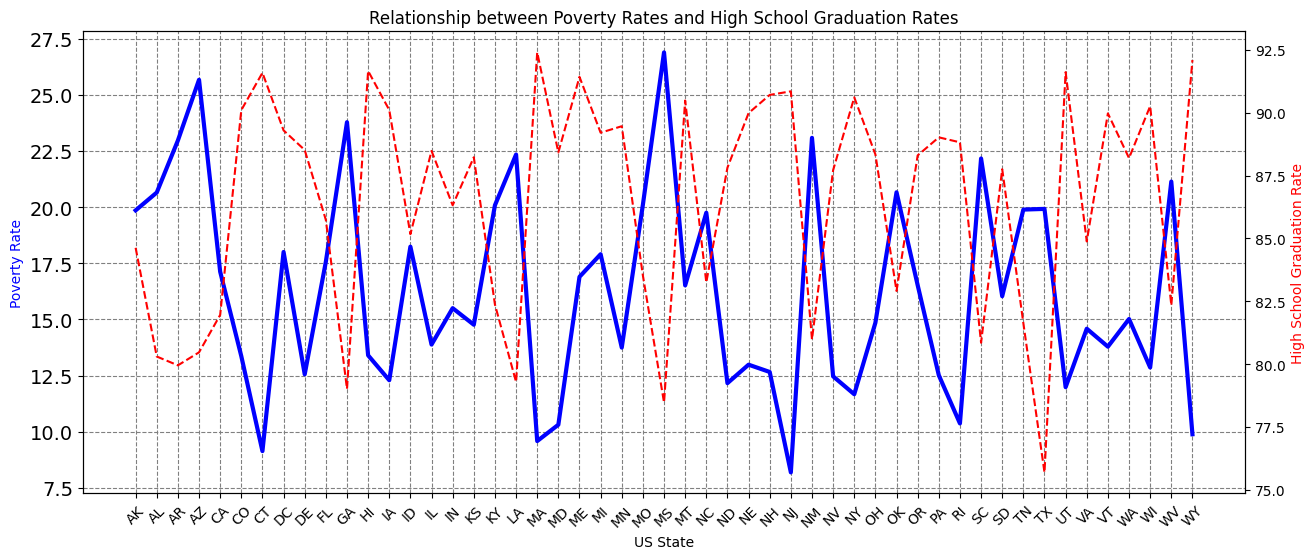

In [ ]:
plt.figure(figsize=(15, 6))
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks( rotation=45)

# twining the graphs
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(us_state_poverty['Geographic Area'], us_state_poverty['poverty_rate'], color='blue', linestyle='-', linewidth=3)
ax2.plot(hs_grad_rate['Geographic Area'], hs_grad_rate['percent_completed_hs'], color='red', linestyle='--')


ax1.set_xlabel('US State')
ax1.set_ylabel('Poverty Rate', color='blue')
ax2.set_ylabel('High School Graduation Rate', color='red')



plt.title('Relationship between Poverty Rates and High School Graduation Rates')
plt.show()

In [ ]:
# merging the datbase
merged_df = pd.merge(us_state_poverty, hs_grad_rate, on='Geographic Area')
merged_df.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,AK,19.85,84.63
1,AL,20.65,80.30
2,AR,22.96,79.95
3,AZ,25.67,80.47
4,CA,17.12,81.96


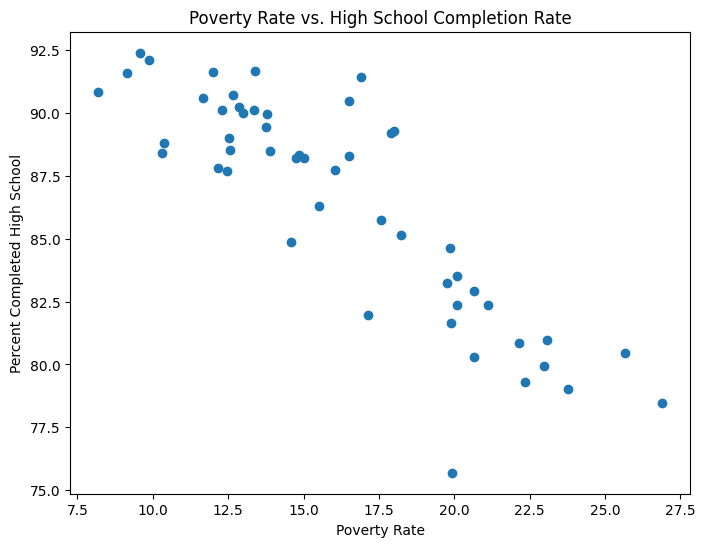

In [ ]:
# @title Poverty Rate vs. High School Completion Rate

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'merged_df'

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['poverty_rate'], merged_df['percent_completed_hs'])
plt.xlabel('Poverty Rate')
plt.ylabel('Percent Completed High School')
_ = plt.title('Poverty Rate vs. High School Completion Rate')
# plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

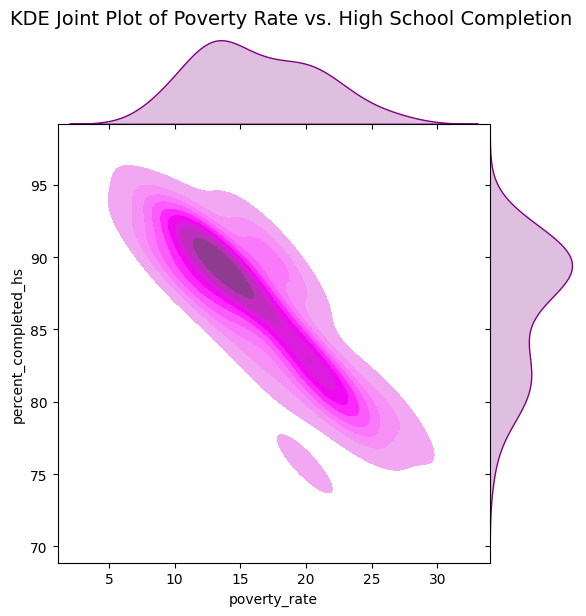

In [ ]:
# Create a jointplot with KDE
sns.jointplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='kde',  # Use KDE for the joint plot
    fill=True,   # Fill the contours for KDE
    color='purple',
    space=0       # Minimize space between the joint and marginal plots
)

# Add a title
plt.suptitle("KDE Joint Plot of Poverty Rate vs. High School Completion",
             fontsize=14, y=1.02)

plt.show()


In [ ]:


# Set up the figure size for consistency
plt.figure(figsize=(15, 6))

# Create the scatter plot using Plotly Express
fig = px.scatter(
    merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    hover_name='Geographic Area',  # Hover will show the area name
    hover_data={
        'poverty_rate': ':.2f',  # Format the poverty rate to 2 decimal places
        'percent_completed_hs': ':.2f'  # Format percentage completed to 2 decimal places
    },
    title='Poverty Rate vs. Percentage Completed High School',
    labels={
        'poverty_rate': 'Poverty Rate (%)',
        'percent_completed_hs': 'High School Completion Rate (%)'
    },
    color='poverty_rate',  # Add color based on poverty rate
    color_continuous_scale=px.colors.sequential.Viridis  # Use a professional color scale
)

# Update the layout for a cleaner look
fig.update_layout(
    title_font_size=18,
    title_x=0.5,  # Center the title
    xaxis=dict(title='Poverty Rate (%)', showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(title='High School Completion Rate (%)', showgrid=True, gridcolor='lightgrey'),
    plot_bgcolor='white',  # Set a clean white background
    coloraxis_colorbar=dict(title='Poverty Rate (%)')  # Label for the colorbar
)

# Update marker styles for clarity
fig.update_traces(
    marker=dict(size=10, opacity=0.8, line=dict(width=1, color='black'))
)

# Display the figure
fig.show()


<Figure size 1500x600 with 0 Axes>

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

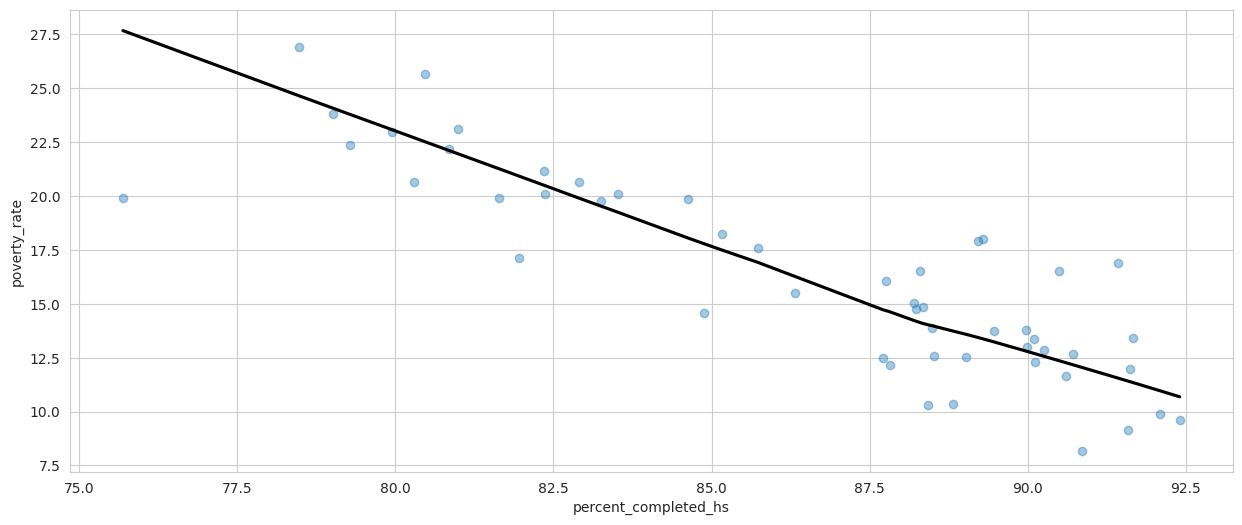

In [ ]:
#Seaborn's .lmplot()  to show a linear regression between the poverty ratio and the high school graduation ratio.

# Set up the figure size for consistency
plt.figure(figsize=(15, 6))
with sns.axes_style('whitegrid'):
  fig = sns.regplot(
      merged_df,
      x= merged_df['percent_completed_hs'],
      y= merged_df['poverty_rate'],
      lowess= True,
      scatter_kws = {'alpha': 0.4},
      line_kws={'color': 'black'})

plt.show()

<Figure size 1500x600 with 0 Axes>

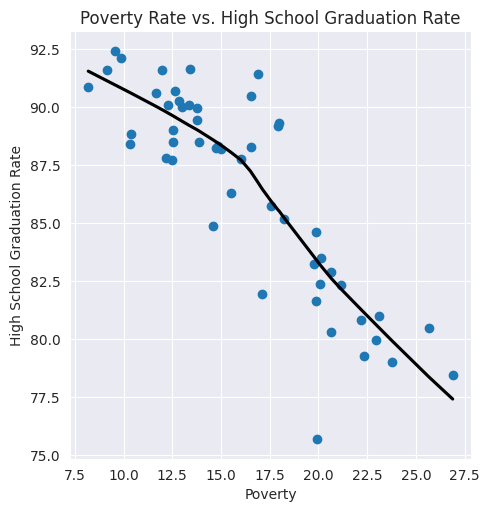

In [ ]:
plt.figure(figsize=(15, 6))


# using .lmplot for the merged_df

with sns.axes_style('darkgrid'):
  fig = sns.lmplot(
      merged_df,
      x = 'poverty_rate',
      y = 'percent_completed_hs',
      lowess=True,
      scatter_kws={'alpha': 1},
      line_kws={'color': 'black'}
      )
  plt.xlabel('Poverty')
  plt.ylabel('High School Graduation Rate')
  plt.title('Poverty Rate vs. High School Graduation Rate')
  plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

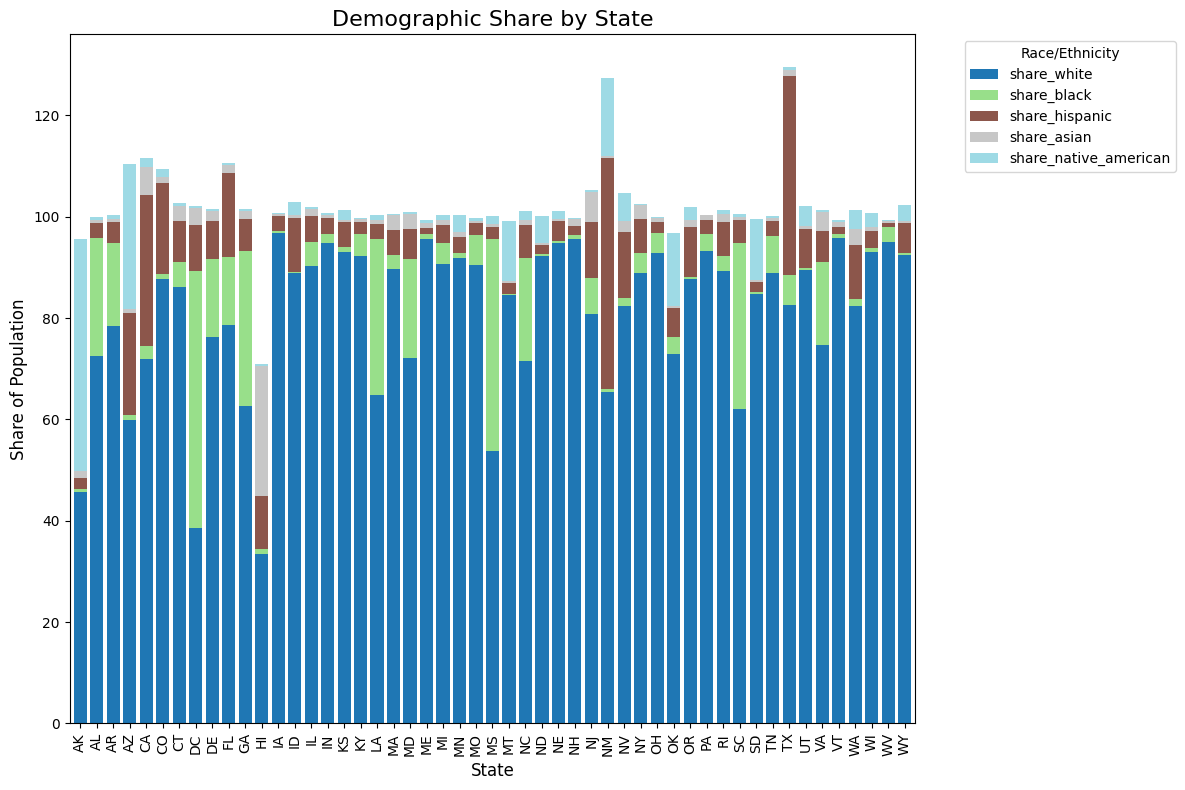

In [ ]:
import mplcursors

# Ensure numeric conversion for the required columns
columns_to_convert = ['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']
for column in columns_to_convert:
    df_share_race_city[column] = pd.to_numeric(df_share_race_city[column], errors='coerce')

# Group by 'Geographic area' and calculate mean for numeric columns
numeric_columns = ['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']
df_state_race = df_share_race_city.groupby('Geographic area', as_index=False)[numeric_columns].mean()

# Set 'Geographic area' as index for the plotting
df_state_race.set_index('Geographic area', inplace=True)

# Create a stacked bar chart
ax = df_state_race.plot(kind='bar',
             stacked=True,
             figsize=(12, 8),
             colormap='tab20',
             width=0.8)

# Set title and labels
ax.set_title('Demographic Share by State', fontsize=16)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Share of Population', fontsize=12)

# Add legend
ax.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add hover effect using mplcursors
mplcursors.cursor(hover=True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
df_share_race_city.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.race.isna().sum()

clean_df_fatalities = df_fatalities.dropna(subset=['race'])

race_counts = clean_df_fatalities['race'].value_counts()

race_counts.rename({'count': "values"})

# creating a pie chart
fig = px.pie(race_counts,
    values=race_counts.values,
    names= race_counts.index,
    hole = 0.3
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [ ]:
race_counts.head()

,count
race,
W,1201
B,618
H,423
A,39
N,31


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
gender_deaths_df = df_fatalities['gender'].value_counts()

gender_deaths_df.head()


# creating a pie chart
fig = px.pie(gender_deaths_df,
    values=gender_deaths_df.values,
    names = gender_deaths_df.index,
    hole = 0.3
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
df_fatalities.manner_of_death.isna().sum()

manner_of_death_df = df_fatalities.groupby(['gender', 'manner_of_death']).agg(death_count=('age', 'count')).reset_index()
# re

manner_of_death_df.head()


# creating a box plot for data visualation
box_plot = px.box(manner_of_death_df,
                  x='gender',
                  y='death_count',
                  color='gender',
                  hover_data={'death_count': True, 'gender': True},
                  title=' Manner of Death by Age',

)
box_plot.update_layout(
    xaxis_title='Gender',
    yaxis_title='Age',
    coloraxis_showscale=False
)
box_plot.update_traces(quartilemethod="exclusive")
box_plot.show()

In [ ]:
age_manner_of_death_df = df_fatalities.groupby(['age', 'manner_of_death']).agg(death_count=('gender', 'count')).reset_index()
age_manner_of_death_df.head()

# # creating a box plot
# box_plot = px.box(age_manner_of_death_df,
#                   x='age',
#                   y='death_count',
#                   color='age',
#                   hover_data={'death_count': True, 'manner_of_death': True},
#                   title=' Manner of Death by Age',

# )
# box_plot.update_layout(
#     xaxis_title='Age',
#     yaxis_title='Death Count',
#     coloraxis_showscale=False
# )
# box_plot.update_traces(quartilemethod="exclusive")
# box_plot.show()

# creating a barchart
fig = px.bar(age_manner_of_death_df,
             x='age',
             y='death_count',
             color='manner_of_death',
             title=' Manner of Death by Age',
             hover_data={'death_count': True, 'manner_of_death': True},
             )
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Death Count',
    coloraxis_showscale=False
)
fig.show()


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
df_fatalities[df_fatalities.armed.isna()]
# droping rows with NaN values for armed
clean_fatalities = df_fatalities.dropna(subset=['armed'])

clean_fatalities.head()

# grouping the database by armed section
armed_df = df_fatalities.armed.value_counts()
armed_df.head()

# creating a pie chart
plt.figure(figsize=(10, 10))
fig = px.pie(
    armed_df,
    values=armed_df.values,
    names=armed_df.index,
    hole=0.3,
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# creating horizontal bar chart
# fig = px.bar(armed_df,
#              y='count',
#              x=armed_df.index,
#              color='count',
#              title='Were People Armed',
#              hover_name=armed_df.index,
#              hover_data={'count': True}
# )
# fig.update_layout(
#     xaxis_title='Count',
#     yaxis_title='Armed',
#     coloraxis_showscale=False
# )
# fig.show()



<Figure size 1000x1000 with 0 Axes>

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities.age.isna().sum()

# droping NaN values for the age
clean_fatalities = df_fatalities.dropna(subset=['age'])

# killed by age_df
age_df = clean_fatalities.age.value_counts()

# sorting the age_df in ascending order

age_df.sort_index(ascending=True, inplace=True)
age_df.head()

# working out to find what percentage of people killed were under 25 years old
under_25_df = age_df[age_df.index < 25]
under_25_df.head()

under_25_death_pct = under_25_df.sum() / age_df.sum() * 100
under_25_death_pct

18.307567127746136

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

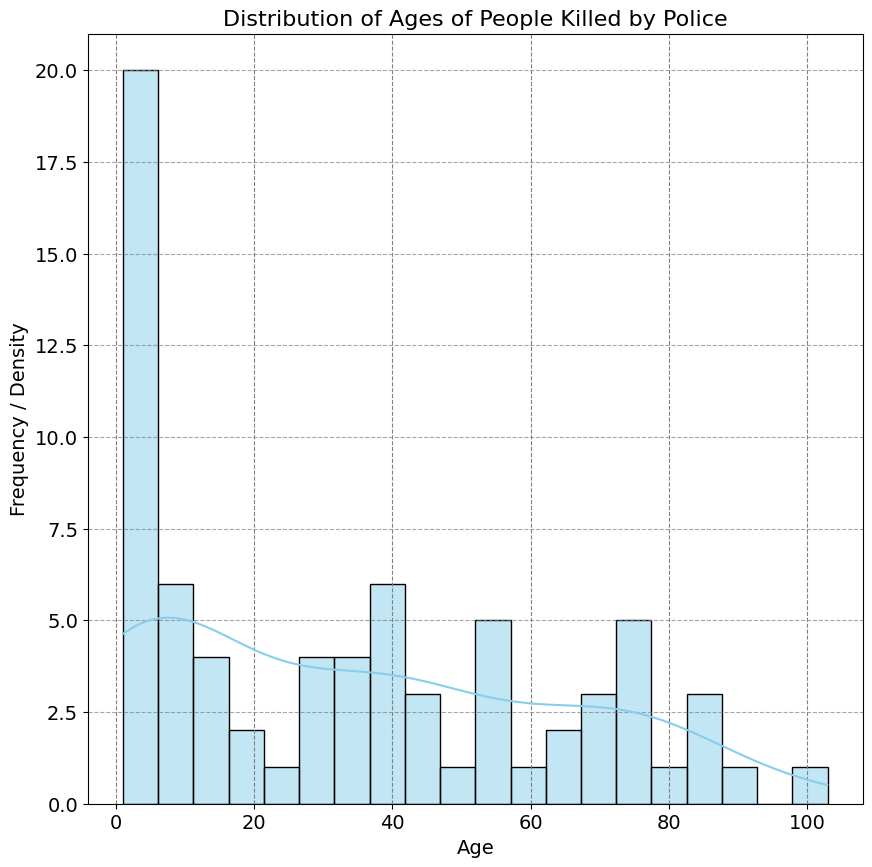

In [ ]:
# creating a histplot and KDE plot using sns

plt.figure(figsize=(10, 10))
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks( fontsize=14)
with sns.axes_style('darkgrid'):
  fig = sns.histplot(
      age_df,
      bins=20,
      kde=True,
      color= 'skyblue',
      alpha=0.5,
      edgecolor='black'
  )
  # Customizing the plot
  plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
  plt.xlabel('Age', fontsize=14)
  plt.ylabel('Frequency / Density', fontsize=14)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()



Create a seperate KDE plot for each race. Is there a difference between the distributions?

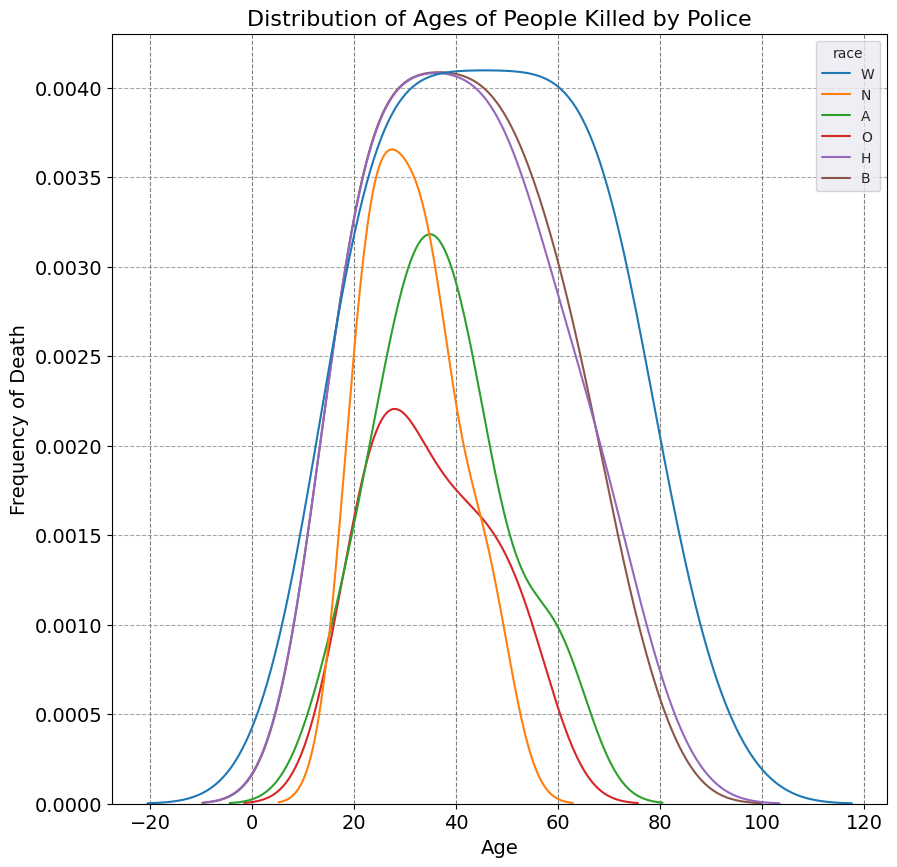

In [120]:
df_fatalities.race.isna().sum()

# dropping NaN values for the races
clean_fatalities = df_fatalities.dropna(subset=['race'])
clean_fatalities.head()

# grouping no of people killed by race
race_df = clean_fatalities.groupby(['age', 'race']).agg(race_death_count=('race', 'count')).reset_index()
race_df.sort_values('race_death_count', ascending=True, inplace=True)

race_df.head()

# creating a KDE plot for each race
plt.figure(figsize=(10, 10))
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks( fontsize=14)
with sns.axes_style('darkgrid'):
  fig = sns.kdeplot(
      data=race_df,
      x='age',
      hue='race',

  )
  # Customizing the plot
  plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
  plt.xlabel('Age', fontsize=14)
  plt.ylabel('Frequency of Death', fontsize=14)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()







# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
# creating a pie chart
plt.figure(figsize=(10, 10))
fig = px.pie(
    race_df,
    values=race_df.values,
    names=race_df.index,
    hole=0.3,
    title= 'Race of People Killed',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<Figure size 1000x1000 with 0 Axes>

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
df_fatalities.signs_of_mental_illness.isna().sum()

# grouping the people based on their mental illness
mental_illness_df = df_fatalities.signs_of_mental_illness.value_counts()
mental_illness_df.head()

# creating a pie chart for the data visulation
plt.figure(figsize=(10, 10))
fig = px.pie(
    mental_illness_df,
    values=mental_illness_df.values,
    names=mental_illness_df.index,
    hole=0.3,
    title= 'Mental Illness and Police Killings',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<Figure size 1000x1000 with 0 Axes>

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
df_fatalities.city.isna().sum()

# df by most death in a city
city_df = df_fatalities.city.value_counts()

top_10_cities = city_df.head(10)
top_10_cities.head()

# creating a bar chat for the proper data visualation
plt.figure(figsize=(15,10))

fig = px.bar(
    top_10_cities,
    x= 'count',
    y= top_10_cities.index,
    title= "Deaths per city",
    color = top_10_cities.index,
    hover_name= top_10_cities.index,
    hover_data = {'count': True},
    orientation= 'h'
)
fig.update_layout(
    xaxis_title='No. Of Death',
    yaxis_title='City',
    coloraxis_showscale=False
)
fig.show()

<Figure size 1500x1000 with 0 Axes>

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
# grouping
killed_race_percity= df_fatalities.groupby(['city', 'race']).agg(race_death_count=('race','count')).reset_index()
killed_race_percity.sort_values( 'race_death_count',ascending=False, inplace=True)

# merging the database
merged_df = pd.merge(killed_race_percity, city_df, on='city')
merged_df.head()

# top_10 city
top_10_cities = merged_df.sort_values('count', ascending=False)[0:20]
len(top_10_cities)


#ploting horizontal chart
h_bar = px.bar(
    top_10_cities,
    x='count',
    y='city',
    color='race',
    color_continuous_scale='Viridis',
    title='Top 20 city by Number of Death',
    orientation='h',
    hover_name='city',  # Adjust this as needed
    hover_data={'race_death_count': True, 'race': True}  # Customize hover data
)

h_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    coloraxis_showscale=False
)

h_bar.show()

In [ ]:
top_10_cities.head()

,city,race,race_death_count,count
33,Los Angeles,W,6,39
1406,Los Angeles,A,1,39
9,Los Angeles,B,10,39
1,Los Angeles,H,19,39
5,Phoenix,W,12,31


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [101]:
# Compute death counts per state
death_per_state = df_fatalities.state.value_counts()

# Convert to DataFrame
death_per_state = death_per_state.reset_index()

# Rename the columns
death_per_state.columns = ['state', 'death_count']

# Display the result
print(death_per_state.head())


  state  death_count
0    CA          424
1    TX          225
2    FL          154
3    AZ          118
4    OH           79


In [103]:
# Load U.S. States GeoJSON
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

# Create the choropleth map
fig = px.choropleth(
    death_per_state,
    geojson=geojson_url,
    locations='state',  # Column in df that matches the GeoJSON "name" property
    locationmode='USA-states',  # Specific mode for US state data
    featureidkey="properties.name",  # Match GeoJSON properties.name with df state names
    color='death_count',  # Column for color intensity
    color_continuous_scale="Viridis",  # Color scale
    scope="usa",  # Restrict map to USA
    title="Choropleth Map of U.S. States",
)

# Customize the layout to center the map
fig.update_geos(
    center={"lat": 37.0902, "lon": -95.7129},  # Approximate center of the USA
    fitbounds="locations",  # Ensure the map fits the data
    visible=False
)

# Adjust margins for better centering
fig.update_layout(
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Remove extra space around the map
    title_x=0.5  # Center the title horizontally
)

# Show the figure
fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [112]:
df_fatalities.head()
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%m/%d/%y')

# creating a new column named year
df_fatalities['year'] = df_fatalities['date'].dt.year

# creating a df with no of police death per year
death_per_year = df_fatalities.year.value_counts().reset_index()
death_per_year.head()

# creating a bar chat
plt.figure(figsize=(15,10))
fig = px.bar(
    death_per_year,
    x= 'year',
    y= 'count',
    title= "Deaths per year",
    color = death_per_year['year'],
    hover_name= death_per_year['year'],
    hover_data = {'count': True},
    orientation= 'v'
)
fig.update_layout(
    xaxis_title='No. Of Death',
    yaxis_title='Year',
    coloraxis_showscale=False
)
fig.show()

<Figure size 1500x1000 with 0 Axes>

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).